## Week 10 Independent Lab Winston Caton

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Independent Lab: Decision Trees


In [3]:
# set working directory
os.chdir("c:\\Users\\winst\\OneDrive\\Desktop\\Python 2\\Week 10\\week10labs\\data")  # change this to your filepath
os.getcwd()  # confirm change

'c:\\Users\\winst\\OneDrive\\Desktop\\Python 2\\Week 10\\week10labs\\data'

In [4]:
# load data
hospitals = pd.read_csv("calihospital.txt", sep='\t')
hospitals.columns

Index(['HospitalID', 'Name', 'Zip', 'Website', 'TypeControl', 'Teaching',
       'DonorType', 'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev',
       'OperInc', 'AvlBeds', 'Work_ID', 'LastName', 'FirstName', 'Gender',
       'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate'],
      dtype='object')

In [5]:
# Convert Categorical Columns to Numeric- Method from Week 10 Tutorial

# get desired columns
num_cols = pd.DataFrame(hospitals[['TypeControl', 'Teaching', 'DonorType']])

# rename the columns to keep them distinct from original DataFrame
num_cols.rename(columns={'TypeControl':'TypeControl2', 'Teaching':'Teaching2', 'DonorType':'DonorType2'}, inplace=True)

# obtain the values to be converted
num_cols['TypeControl2'].unique()
num_cols['Teaching2'].unique()
num_cols['DonorType2'].unique()

# convert TypeControl to numeric
replace_dict = {'City/County': '0', 'District': '1', 'Investor': '2', 'Non Profit': '3'}  # keys are str and so must be values
num_cols.TypeControl2 = num_cols.TypeControl2.replace(replace_dict).astype(int)  # cast values to int

# convert Teaching to numeric
replace_dict = {'Small/Rural': '0', 'Teaching': '1'}
num_cols.Teaching2 = num_cols.Teaching2.replace(replace_dict).astype(int)

# convert DonorType to numeric
replace_dict = {'Alumni': '0', 'Charity': '1'}
num_cols.DonorType2 = num_cols.DonorType2.replace(replace_dict).astype(int)

# create new df with numeric columns
hospitals_2 = pd.concat([hospitals, num_cols], axis=1)
hospitals_2.columns

Index(['HospitalID', 'Name', 'Zip', 'Website', 'TypeControl', 'Teaching',
       'DonorType', 'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev',
       'OperInc', 'AvlBeds', 'Work_ID', 'LastName', 'FirstName', 'Gender',
       'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate',
       'TypeControl2', 'Teaching2', 'DonorType2'],
      dtype='object')

## Classification Tree 1 for TypeControl
# Teaching + NoFTE + OperInc -> TypeControl

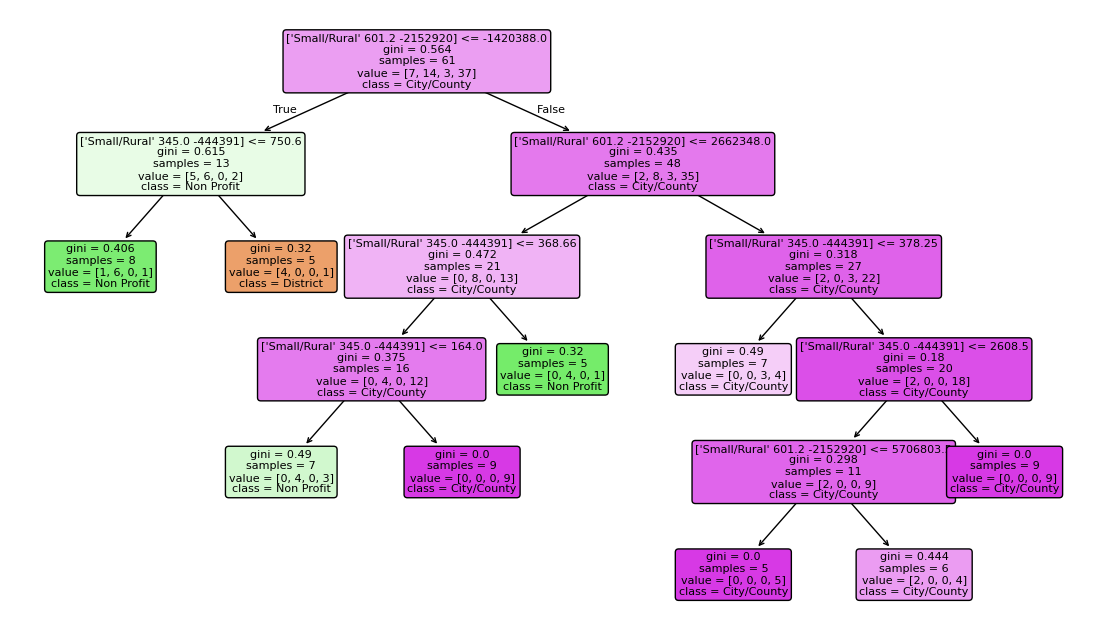

In [8]:
# create labels
col_names = list(hospitals_2[['Teaching','NoFTE','OperInc']].values)
classnames = list(hospitals_2['TypeControl'].unique())

# fit model
tree_model_1 = tree.DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=5).fit(hospitals_2[['Teaching2','NoFTE','OperInc']], hospitals_2['TypeControl'])

# visualize tree
plt.figure(figsize=(14,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_model_1,
                feature_names=col_names,
                class_names=classnames,
                filled=True, rounded=True,
                fontsize=8)
plt.show()

              precision    recall  f1-score   support

 City/County       0.80      0.57      0.67         7
    District       0.70      1.00      0.82        14
    Investor       0.00      0.00      0.00         3
  Non Profit       0.86      0.84      0.85        37

    accuracy                           0.80        61
   macro avg       0.59      0.60      0.58        61
weighted avg       0.77      0.80      0.78        61

[[ 4  1  0  2]
 [ 0 14  0  0]
 [ 0  0  0  3]
 [ 1  5  0 31]]


c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

([<matplotlib.axis.XTick at 0x240108f3020>,
 [Text(0, 1, 'Yes'), Text(1, 1, 'No')])

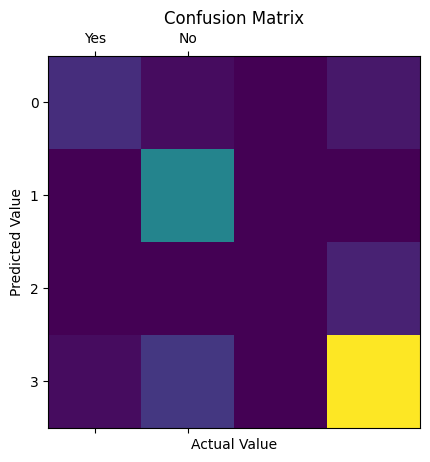

In [9]:
# get predicted values
predicted = tree_model_1.predict(hospitals_2[['Teaching2','NoFTE','OperInc']])

# get performance metrics for model evaluation
print(metcs.classification_report(hospitals_2['TypeControl'], predicted))

# create and display confusion matrix
cm = metcs.confusion_matrix(hospitals_2['TypeControl'], predicted)
print(cm)

# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1], ['Yes','No'])

## Classification Tree 2 for Teaching
# DonorType + AvlBeds + OperRev -> Teaching

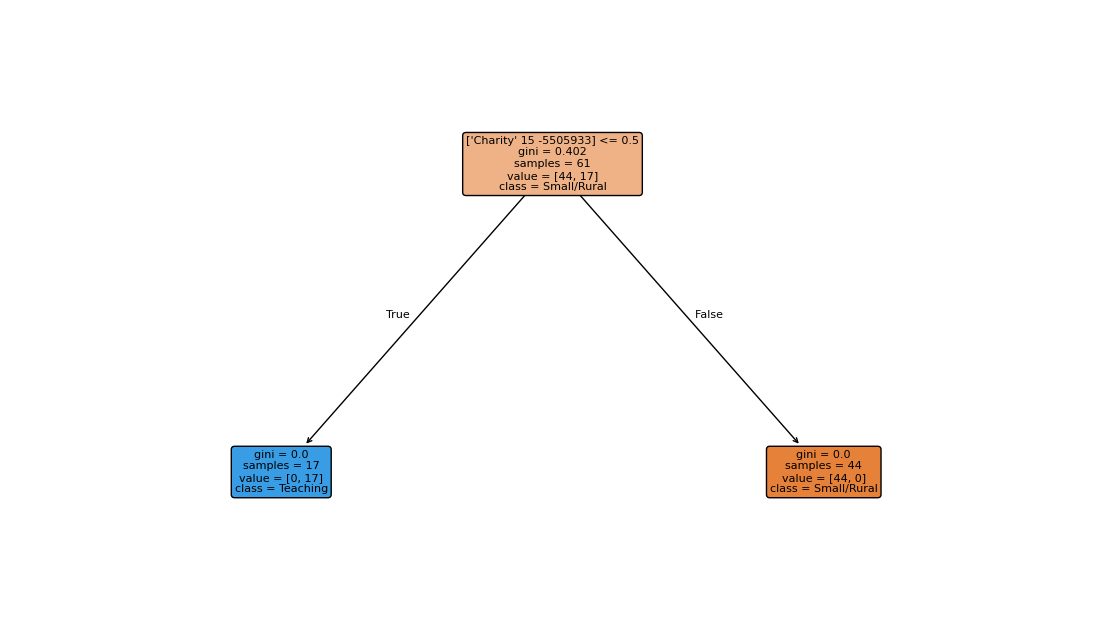

In [10]:
# create labels
col_names = list(hospitals_2[['DonorType','AvlBeds','OperInc']].values)
classnames = list(hospitals_2['Teaching'].unique())

# fit model
tree_model_2 = tree.DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=5).fit(hospitals_2[['DonorType2','AvlBeds','OperInc']], hospitals_2['Teaching'])

# visualize tree
plt.figure(figsize=(14,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_model_2,
                feature_names=col_names,
                class_names=classnames,
                filled=True, rounded=True,
                fontsize=8)
plt.show()

By looking at our dataframe, we can see that all hospitals that are Charity, are also Small/Rural, so these two variables are too closely related to have a meaningful classification tree.  This Tree should be disregarded.

## Classification Tree 3 for TypeControl
# DonorType + InOperExp + NoFTE -> TypeControl

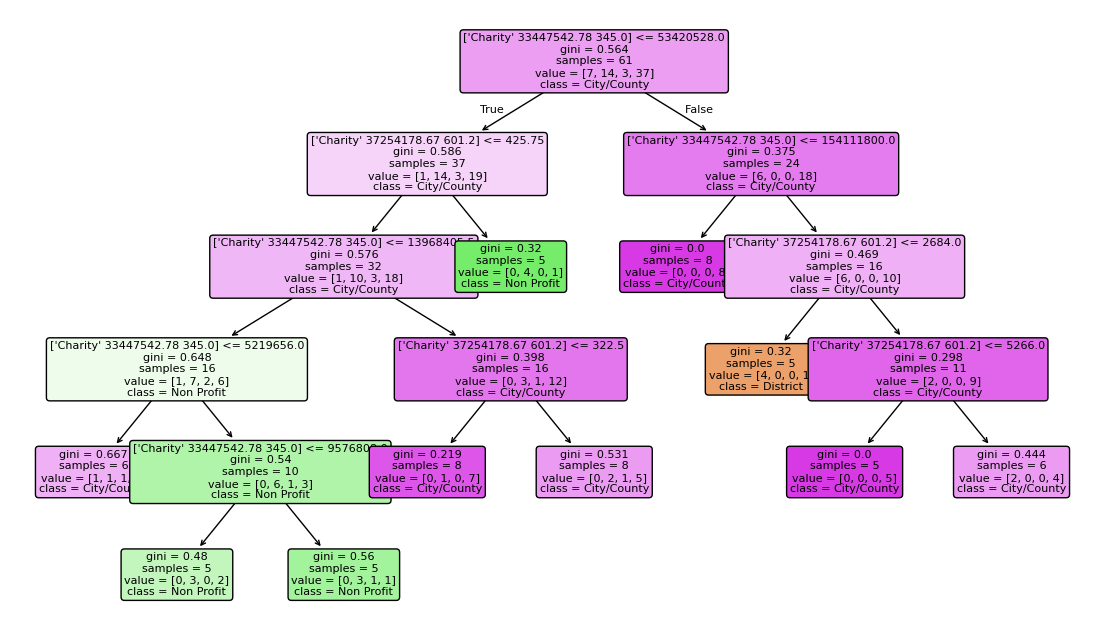

In [11]:
# create labels
col_names = list(hospitals_2[['DonorType','InOperExp','NoFTE']].values)
classnames = list(hospitals_2['TypeControl'].unique())

# fit model
tree_model_3 = tree.DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=5).fit(hospitals_2[['DonorType2','InOperExp','NoFTE']], hospitals_2['TypeControl'])

# visualize tree
plt.figure(figsize=(14,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_model_3,
                feature_names=col_names,
                class_names=classnames,
                filled=True, rounded=True,
                fontsize=8)
plt.show()

              precision    recall  f1-score   support

 City/County       0.80      0.57      0.67         7
    District       0.67      0.71      0.69        14
    Investor       0.00      0.00      0.00         3
  Non Profit       0.78      0.86      0.82        37

    accuracy                           0.75        61
   macro avg       0.56      0.54      0.54        61
weighted avg       0.72      0.75      0.73        61

[[ 4  0  0  3]
 [ 0 10  0  4]
 [ 0  1  0  2]
 [ 1  4  0 32]]


c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

([<matplotlib.axis.XTick at 0x240109ce270>,
 [Text(0, 1, 'Yes'), Text(1, 1, 'No')])

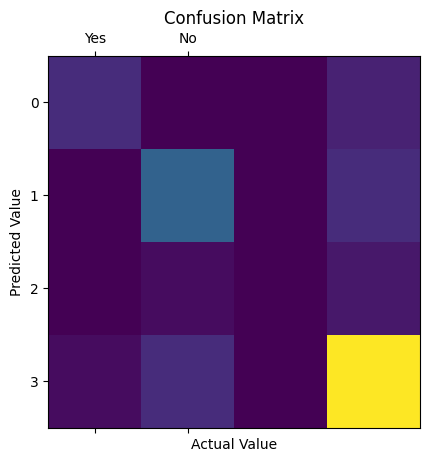

In [12]:
# get predicted values
predicted = tree_model_3.predict(hospitals_2[['DonorType2','InOperExp','NoFTE']])

# get performance metrics for model evaluation
print(metcs.classification_report(hospitals_2['TypeControl'], predicted))

# create and display confusion matrix
cm = metcs.confusion_matrix(hospitals_2['TypeControl'], predicted)
print(cm)

# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1], ['Yes','No'])

## Classification Tree 4 for TypeControl
# DonorType + OperInc + AvlBeds -> TypeControl

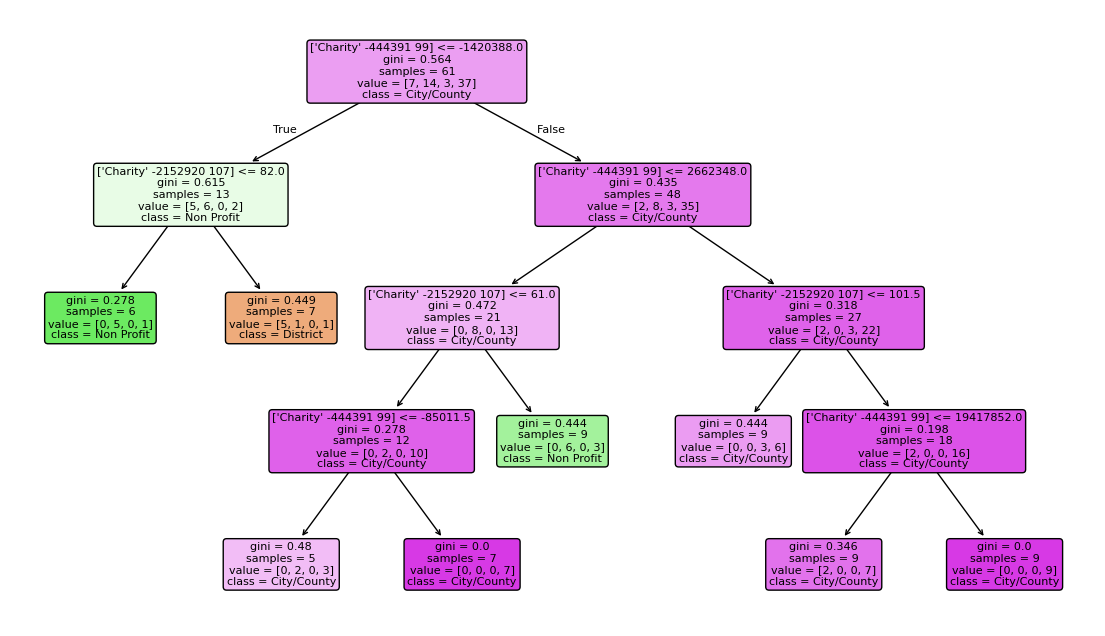

In [13]:
# create labels
col_names = list(hospitals_2[['DonorType','OperInc','AvlBeds']].values)
classnames = list(hospitals_2['TypeControl'].unique())

# fit model
tree_model_4 = tree.DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=5).fit(hospitals_2[['DonorType2','OperInc','AvlBeds']], hospitals_2['TypeControl'])

# visualize tree
plt.figure(figsize=(14,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_model_4,
                feature_names=col_names,
                class_names=classnames,
                filled=True, rounded=True,
                fontsize=8)
plt.show()

              precision    recall  f1-score   support

 City/County       0.71      0.71      0.71         7
    District       0.73      0.79      0.76        14
    Investor       0.00      0.00      0.00         3
  Non Profit       0.82      0.86      0.84        37

    accuracy                           0.79        61
   macro avg       0.57      0.59      0.58        61
weighted avg       0.75      0.79      0.77        61

[[ 5  0  0  2]
 [ 1 11  0  2]
 [ 0  0  0  3]
 [ 1  4  0 32]]


c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\winst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

([<matplotlib.axis.XTick at 0x240107f9970>,
 [Text(0, 1, 'Yes'), Text(1, 1, 'No')])

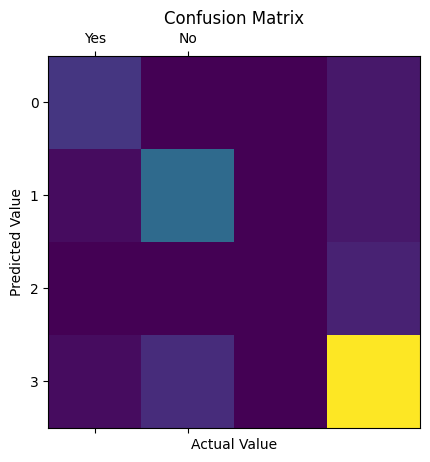

In [14]:
# get predicted values
predicted = tree_model_4.predict(hospitals_2[['DonorType2','OperInc','AvlBeds']])

# get performance metrics for model evaluation
print(metcs.classification_report(hospitals_2['TypeControl'], predicted))

# create and display confusion matrix
cm = metcs.confusion_matrix(hospitals_2['TypeControl'], predicted)
print(cm)

# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1], ['Yes','No'])

Based on the confusion matrixes, the last classification tree has the most correctly predicted values of all of the trees built, therefore it is the best model.  From a business perspective, I think that operating income and available beds both are meaningful values that would impact the type of hospital that is being examined.

However our second tree, which was 